In [1]:
# Import necessary packages

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from scipy.stats import linregress
from operator import itemgetter

In [2]:
# Import the datasets

dfStars = pd.read_csv('stars-data.csv')
dfNoStars = pd.read_csv('no-stars-data.csv')

In [3]:
# Preview the dataset

dfNoStars.head()

,Rk,2018-19 Salary,Player,Pos,Age,Tm,G,GS,MP,FG,...,BLK,TOV,PF,PPG,WS,OBPM,DBPM,BPM,VORP,All-NBA
0,1,5455236,Alex Abrines,SG,24,OKC,75,8,15.1,1.5,...,0.1,0.3,1.7,4.7,2.2,-0.5,-1.7,-2.2,-0.1,0
1,2,24157304,Steven Adams,C,24,OKC,76,76,32.7,5.9,...,1.0,1.7,2.8,13.9,9.7,2.2,1.1,3.3,3.3,0
2,3,685341,Cole Aldrich,C,29,MIN,21,0,2.3,0.2,...,0.0,0.0,0.5,0.6,0.0,-7.0,0.1,-6.9,-0.1,0
3,4,22347015,LaMarcus Aldridge,C,32,SAS,75,75,33.5,9.2,...,1.2,1.5,2.1,23.1,10.9,3.0,0.3,3.3,3.3,5
4,5,6957105,Al-Farouq Aminu,PF,27,POR,69,67,30.0,3.3,...,0.6,1.1,2.0,9.3,4.2,-0.8,1.9,1.1,1.6,0


In [4]:
# Create function that adjusts salary figures to add $ sign and divide by 1 million

def millions(x, pos):
    return '$%1.0fM' % (x*1e-6)

In [5]:
# Create function that returns r_value, r^2, and p_value for regressions to be used in graphs

def linStats(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    
    if(p_value < 0.001):
        pString = ", p < 0.001"
    else:
        pString = ", p = %.3f" % p_value
        
    rsquared = r_value ** 2
    
    rpString = "r = " + str(round(r_value, 3)) + ", r-squared = " + str(round(rsquared, 3)) + pString
    return rpString

In [6]:
# Create function that plots the linear trendline for the graph

def linTrend(x, y, ax = None):
    ax = ax
    return ax.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

In [7]:
# Create function that plots the correlations between a given value x and a player's 2018-19 salary

y = '2018-19 Salary'

plt.style.use('fivethirtyeight')

def plot(x):
    z, ax = plt.subplots()

    ax.scatter(dfNoStars[x.upper()], dfNoStars[y], color = 'orange')
    z.suptitle("Correlation between %s and salary" % x.upper(), weight = 'bold', size = 18, y = 1.007)
    ax.set_xlabel("2017-18 %s" % x.upper())
    ax.set_ylabel(y)
    
    ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
    ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)
    
    linTrend(dfNoStars[x.upper()], dfNoStars[y], ax)
    
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    
    ax.set_title("%s"%linStats(dfNoStars[x.upper()], dfNoStars[y]), size = 14, fontname = 'Rockwell')
    
    z.text(x = -.1, y = -.1,
        s = '__________________________________________________________________',
        fontsize = 14, color = 'grey', horizontalalignment='left')
    
    z.text(x = -.1, y = -.18,
        s = 'dribbleanalytics.blogspot.com                     Source: Basketball Reference',
        fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

    z.savefig("%s-correl.png" % x, dpi = 400, bbox_inches = 'tight')

Note: all these correlations are done with dfNoStars, meaning the top 10 NBA players are excluded

# Correlation between PPG, WS, BPM, VORP and salary

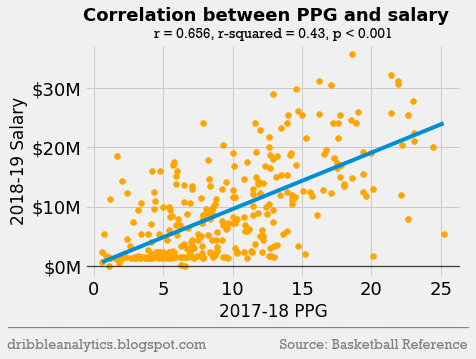

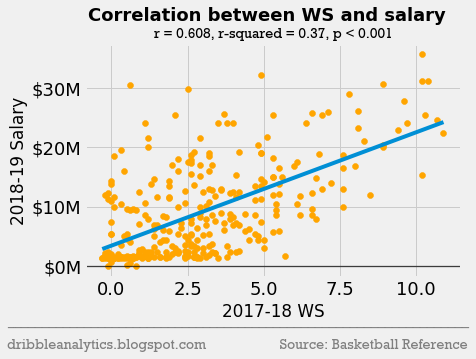

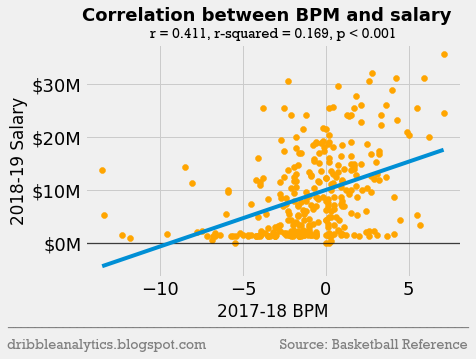

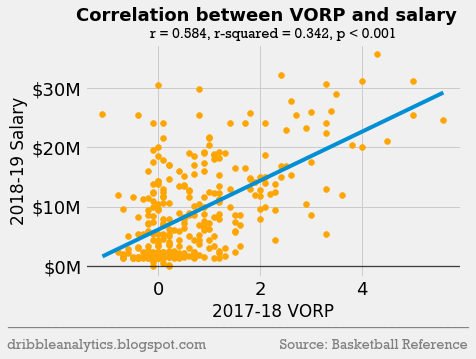

In [8]:
plotList = ['ppg', 'ws', 'bpm', 'vorp']

for i in plotList:
    plot(i)

# Use average sum of stats to predict salary

In [9]:
# Create function that takes the sum of a stat and divides it by the sum of the salary of non-stars to create a salary/stat
# constant, which is then multiplied by the stars' stat to give a stat-adjusted star salary

totalSalary = dfNoStars['2018-19 Salary'].sum()
starNames = dfStars.iloc[:, 2]

def salary(x, y):
    totalStat = dfNoStars[x].sum()
    
    if(totalStat < 0):
        salaryPerStat = -(totalSalary / totalStat)
    else:
        salaryPerStat = totalSalary / totalStat
    
    print("Salary per %s: %.3f" %(x, salaryPerStat))
    
    starSalaryStat = []    
    for i in dfStars[x]:
        starSalaryStat.append(i * salaryPerStat)
        
    for(i, j) in zip(starNames, starSalaryStat):
        print(i, j)
    
    for i in starSalaryStat:
        y.append(i)

In [10]:
# Create function that graphs the adjusted salary data given a list of the data, the title of the graph, the name to save
# the file, and various numbers of how high to move the data labels

xBar = np.arange(len(starNames))
plt.style.use('fivethirtyeight')

def salaryPlot(x, title, filename, textThreshold, textBottom, textTop):
    
    combinedList = [[i, j] for i, j in zip(starNames, x)]
    sortedList = sorted(combinedList, key = itemgetter(1), reverse = True)
    sortedData = [row[1] for row in sortedList]
    sortedNames = [row[0] for row in sortedList]
    
    z, ax = plt.subplots()
    
    ax.bar(xBar, sortedData, edgecolor = 'white', linewidth = 3, color = 'skyblue')
    
    labels = sortedNames
    rects = ax.patches
    for rect, label in zip(rects, labels):
        if(rect.get_height() < textThreshold):
            ax.text(rect.get_x() + rect.get_width() / 1.8, rect.get_height() + textTop, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'black', size = 15)
        elif(rect.get_height() > textThreshold):
            ax.text(rect.get_x() + rect.get_width() / 1.8, textBottom, label,
            ha='center', va='bottom', rotation = 'vertical', color = 'black', size = 15)
        
    z.suptitle("%s" % title, weight = 'bold', size = 18, y = .95)
    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    ax.xaxis.set_visible(False)
    ax.set_ylabel("Adjusted 2018-19 Salary")
    
    ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
    ax.axhline(y = 0, color = 'black', linewidth = 4, alpha = .7)
    
    z.text(x = -.12, y = -.01,
    s = '____________________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')
    
    z.text(x = -.1, y = -.08,
    s = 'dribbleanalytics.blogspot.com                     Source: Basketball Reference',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')
    
    z.savefig("%s.png" % filename, dpi = 400, bbox_inches = 'tight')

Salary per OBPM: 13118007.047
LeBron 99696853.55822551
Curry 129868269.76663586
Harden 125932867.65249538
KD 65590035.23567468
Giannis 51160227.48382625
Davis 36730419.73197782
Westbrook 66901835.940388165
Kawhi 83955245.10166359
Embiid 1311800.7047134936
Lillard 101008654.262939


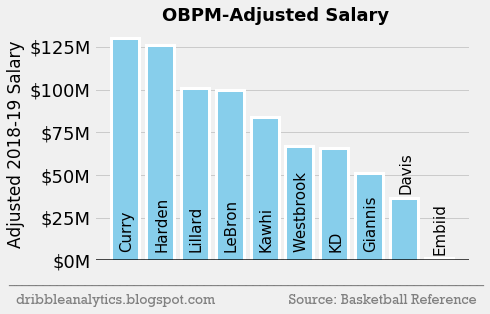

In [11]:
obpmList = []

salary('OBPM', obpmList)

salaryPlot(obpmList, "OBPM-Adjusted Salary", "obpm-salary", 40000000, 5000000, 2000000)

Salary per VORP: 12684257.038
LeBron 112889887.63404827
Curry 55810730.96514746
Harden 105279333.41152816
KD 57079156.6689008
Giannis 68494988.00268097
Davis 62152859.48391421
Westbrook 95131927.78150134
Kawhi 78642393.63270777
Embiid 27905365.48257373
Lillard 74837116.52144773


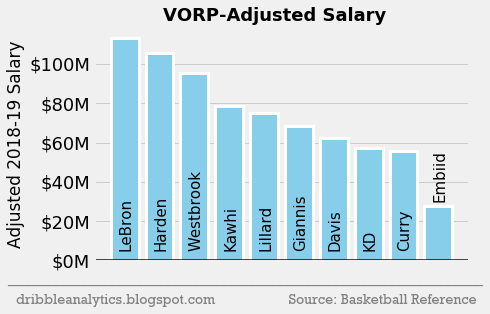

In [12]:
vorpList = []

salary('VORP', vorpList)

salaryPlot(vorpList, "VORP-Adjusted Salary", "vorp-salary", 40000000, 5000000, 2000000)

Salary per BPM: 10402113.320
LeBron 99860287.87101503
Curry 89458174.55111763
Harden 113383035.18688165
KD 58251834.59142543
Giannis 60332257.25540491
Davis 54090989.26346647
Westbrook 85297329.22315866
Kawhi 82176695.22718945
Embiid 27045494.631733235
Lillard 69694159.24331257


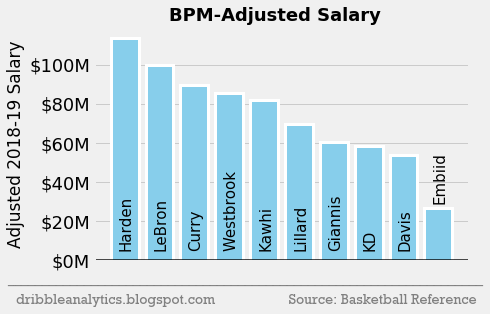

In [13]:
bpmList = []

salary('BPM', bpmList)

salaryPlot(bpmList, "BPM-Adjusted Salary", "bpm-salary", 40000000, 5000000, 2000000)

# Use median sum of stats to predict salary

In the case of PPG, all players have a positive PPG, so the salary per PPG is very low. The same goes for WS (though not all players have positive WS, most players not on rookie contracts do). Therefore, to assign a salary on these stats, let's try distance from the median.

In [14]:
# Find medianWS and medianPPG 

medianWS = dfNoStars['WS'].median()
medianPPG = dfNoStars['PPG'].median()

Salary per WS Distance from Median: 4713160.759
LeBron 53730032.64984228
Curry 30635544.931927614
Harden 60328457.712103605
KD 36762653.91831314
Giannis 43832395.05645028
Davis 52316084.42221484
Westbrook 35348705.690685704
Kawhi 51844768.34633903
Embiid 16967378.73152914
Lillard 47131607.58758094


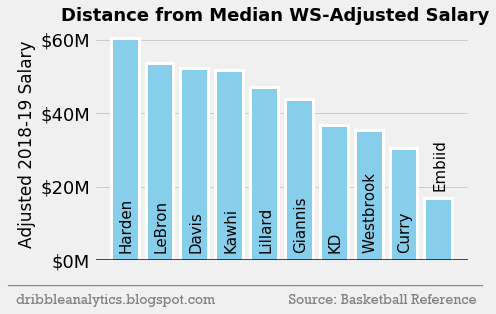

In [15]:
dfNoStars['WS Distance from Median'] = abs(dfNoStars['WS'] - medianWS)
dfStars['WS Distance from Median'] = abs(dfStars['WS'] - medianWS)

wsDistMed = []

salary('WS Distance from Median', wsDistMed)

salaryPlot(wsDistMed, "Distance from Median WS-Adjusted Salary", "ws-dist-med-salary", 20000000, 2000000, 2000000)

The above stats are simply distance from the median. So, someone who scores 5 points below the median still has a +5 PPG, thereby inflating the stat. Let's see what happens if we make it that anyone who is below the median has 0.

Salary per WS >0 Distance from Median: 7891956.422
LeBron 89968303.21100919
Curry 51297716.74311927
Harden 101017042.20183487
KD 61557260.09174313
Giannis 73395194.72477065
Davis 87600716.28440367
Westbrook 59189673.16513762
Kawhi 86811520.64220184
Embiid 28411043.11926606
Lillard 78919564.22018349


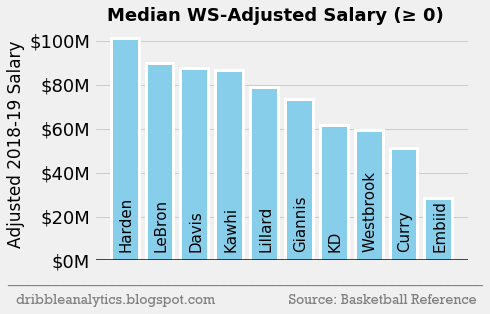

In [16]:
dfNoStars['WS >0 Distance from Median'] = (dfNoStars['WS'] - medianWS).clip_lower(0)
dfStars['WS >0 Distance from Median'] = (dfStars['WS'] - medianWS).clip_lower(0)

ws0Med = []

salary('WS >0 Distance from Median', ws0Med)

salaryPlot(ws0Med, "Median WS-Adjusted Salary (≥ 0)", "ws-greater-0-med-salary", 20000000, 4000000, 2000000)

Salary per WS - Median: 24241987.404
LeBron 276358656.4047823
Curry 157572918.12553376
Harden 310297438.77028185
KD 189087501.7506405
Giannis 225450482.8565329
Davis 269086060.18360376
Westbrook 181814905.529462
Kawhi 266661861.44321096
Embiid 87271154.65414177
Lillard 242419874.03928268


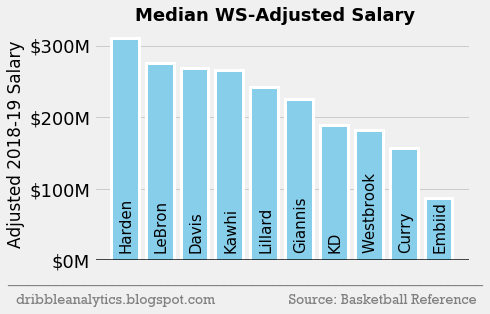

In [17]:
dfNoStars['WS - Median'] = (dfNoStars['WS'] - medianWS)
dfStars['WS - Median'] = (dfStars['WS'] - medianWS)

wsMinusMed = []

salary('WS - Median', wsMinusMed)

salaryPlot(wsMinusMed, "Median WS-Adjusted Salary", "ws-med-salary", 20000000, 10000000, 2000000)

Salary per PPG Distance from Median: 2066188.751
LeBron 39257586.26901521
Curry 36984778.642914325
Harden 45249533.64691753
KD 36984778.642914325
Giannis 38017873.01841472
Davis 40497299.51961569
Westbrook 34918589.891913526
Kawhi 35125208.76701361
Embiid 29753118.014411524
Lillard 38017873.01841472


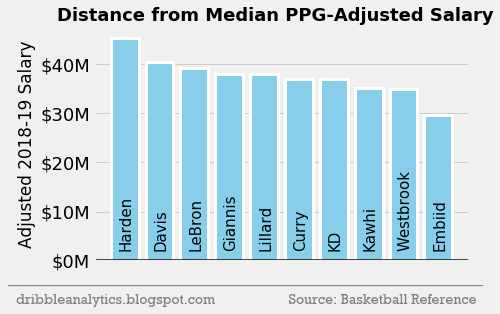

In [18]:
dfNoStars['PPG Distance from Median'] = abs(dfNoStars['PPG'] - medianPPG)
dfStars['PPG Distance from Median'] = abs(dfStars['PPG'] - medianPPG)

ppgDistMed = []

salary('PPG Distance from Median', ppgDistMed)

salaryPlot(ppgDistMed, "Distance from Median PPG-Adjusted Salary", "ppg-dist-med-salary", 20000000, 2000000, 2000000)

Salary per PPG >0 Distance from Median: 3373023.675
LeBron 64087449.82770911
Curry 60377123.78505226
Harden 73869218.4856226
KD 60377123.78505226
Giannis 62063635.622623555
Davis 66111264.03279467
Westbrook 57004100.109909676
Kawhi 57341402.47742394
Embiid 48571540.92205322
Lillard 62063635.622623555


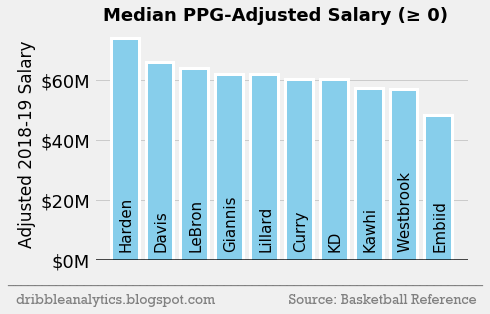

In [19]:
# Subtract median PPG from individual PPG with a lower clip of 0, meaning all values are >= 0

dfNoStars['PPG >0 Distance from Median'] = (dfNoStars['PPG'] - medianPPG).clip_lower(0)
dfStars['PPG >0 Distance from Median'] = (dfStars['PPG'] - medianPPG).clip_lower(0)

ppg0Med = []

salary('PPG >0 Distance from Median', ppg0Med)

salaryPlot(ppg0Med, "Median PPG-Adjusted Salary (≥ 0)", "ppg-greater-0-med-salary", 20000000, 3000000, 2000000)

Now let's see what happens when the salary is actually adjusted to the salary per (stat - median stat)

Salary per PPG - Median: 9177939.622
LeBron 174380852.81280312
Curry 164285119.22890398
Harden 200996877.71580988
KD 164285119.22890398
Giannis 168874089.0397672
Davis 179887616.585839
Westbrook 155107179.6071775
Kawhi 156024973.56935015
Embiid 132162330.55286129
Lillard 168874089.0397672


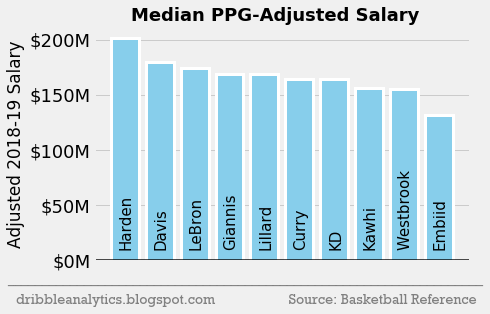

In [20]:
dfNoStars['PPG - Median'] = (dfNoStars['PPG'] - medianPPG)
dfStars['PPG - Median'] = (dfStars['PPG'] - medianPPG)

ppgMinusMed = []

salary('PPG - Median', ppgMinusMed)

salaryPlot(ppgMinusMed, "Median PPG-Adjusted Salary", "ppg-med-salary", 20000000, 10000000, 2000000)